![](https://thumbs.gfycat.com/FeistyNaughtyFinch-size_restricted.gif)
# Predicting rain in Australia

This week, we are working with the dataset to predict the possibility of raining the next day. Studies in 2006 showed that weather information had an average value of 109 dollars per US household each year. This equates to an overall economic benefit of over 12 billion dollars per annum. Being able to forecast and plan for the future when it comes to the local climate is a major advantage when it comes to planning tourism facilities. The transport sector can also benefit, as infrastructure can be set up to measure road surface conditions to improve traffic safety.

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Creating a function to print 
def overview():
    data =pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
    print("First 5 lines of data:\n")
    print(data.head())
    print("\n\n\n")
    print("There are {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\n")
    print("Data types:\n")
    print(data.dtypes)
    print("\n\n\n")
    print("% of missing values per column:\n")
    print(data.isnull().mean().round(2)*100)
    print("Statistical summary:\n")
    print(data.describe())
    return data
    
data = overview()

First 5 lines of data:

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  

- It seems like we have quite alot of data cleaning to do (dealing with NaN values).
- For columns with less than 5% missing values, we will remove the affected rows.
- For columns with more than 5% missing values, we will fill it with median (numerical data) and mode (categorical data).
- As stated in the dataset description, we will drop the column call "RISK_MM" since it will affect our forcasting.

In [3]:
data.drop(columns = "RISK_MM", inplace = True)

## Looking into distribution for RainTomorrow

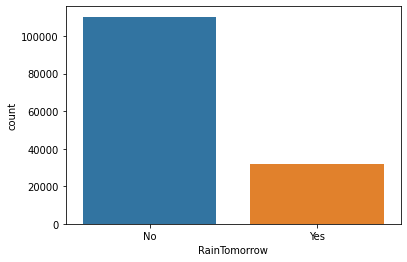

In [4]:
sns.countplot(data = data, x = "RainTomorrow")

## Looking into distribution for RainToday

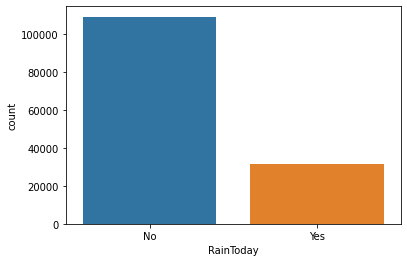

In [5]:
sns.countplot(data = data, x = "RainToday")

## Looking into min temp and max temp

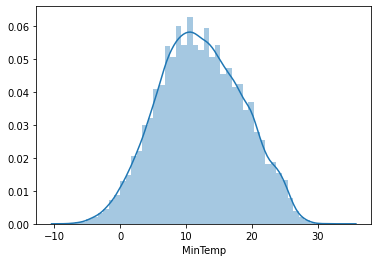

In [6]:
sns.distplot(data['MinTemp'])

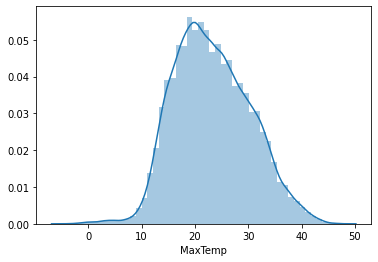

In [7]:
sns.distplot(data['MaxTemp'])

- We can see that the min temperature is clustered around 10 while max temperature is around 20. 

## Pairplot

In [8]:
# Create a function to separate out numerical and categorical data 
    ## Using this function to ensure that all non-numerical in a numerical column 
    ## and non-categorical in a categorical column is annotated
def cat_variable(df):
    return list(df.select_dtypes(include = ['category', 'object']))
    
def num_variable(df):
    return list(df.select_dtypes(exclude = ['category', 'object']))

categorical_variable = cat_variable(data)
numerical_variable = num_variable(data)

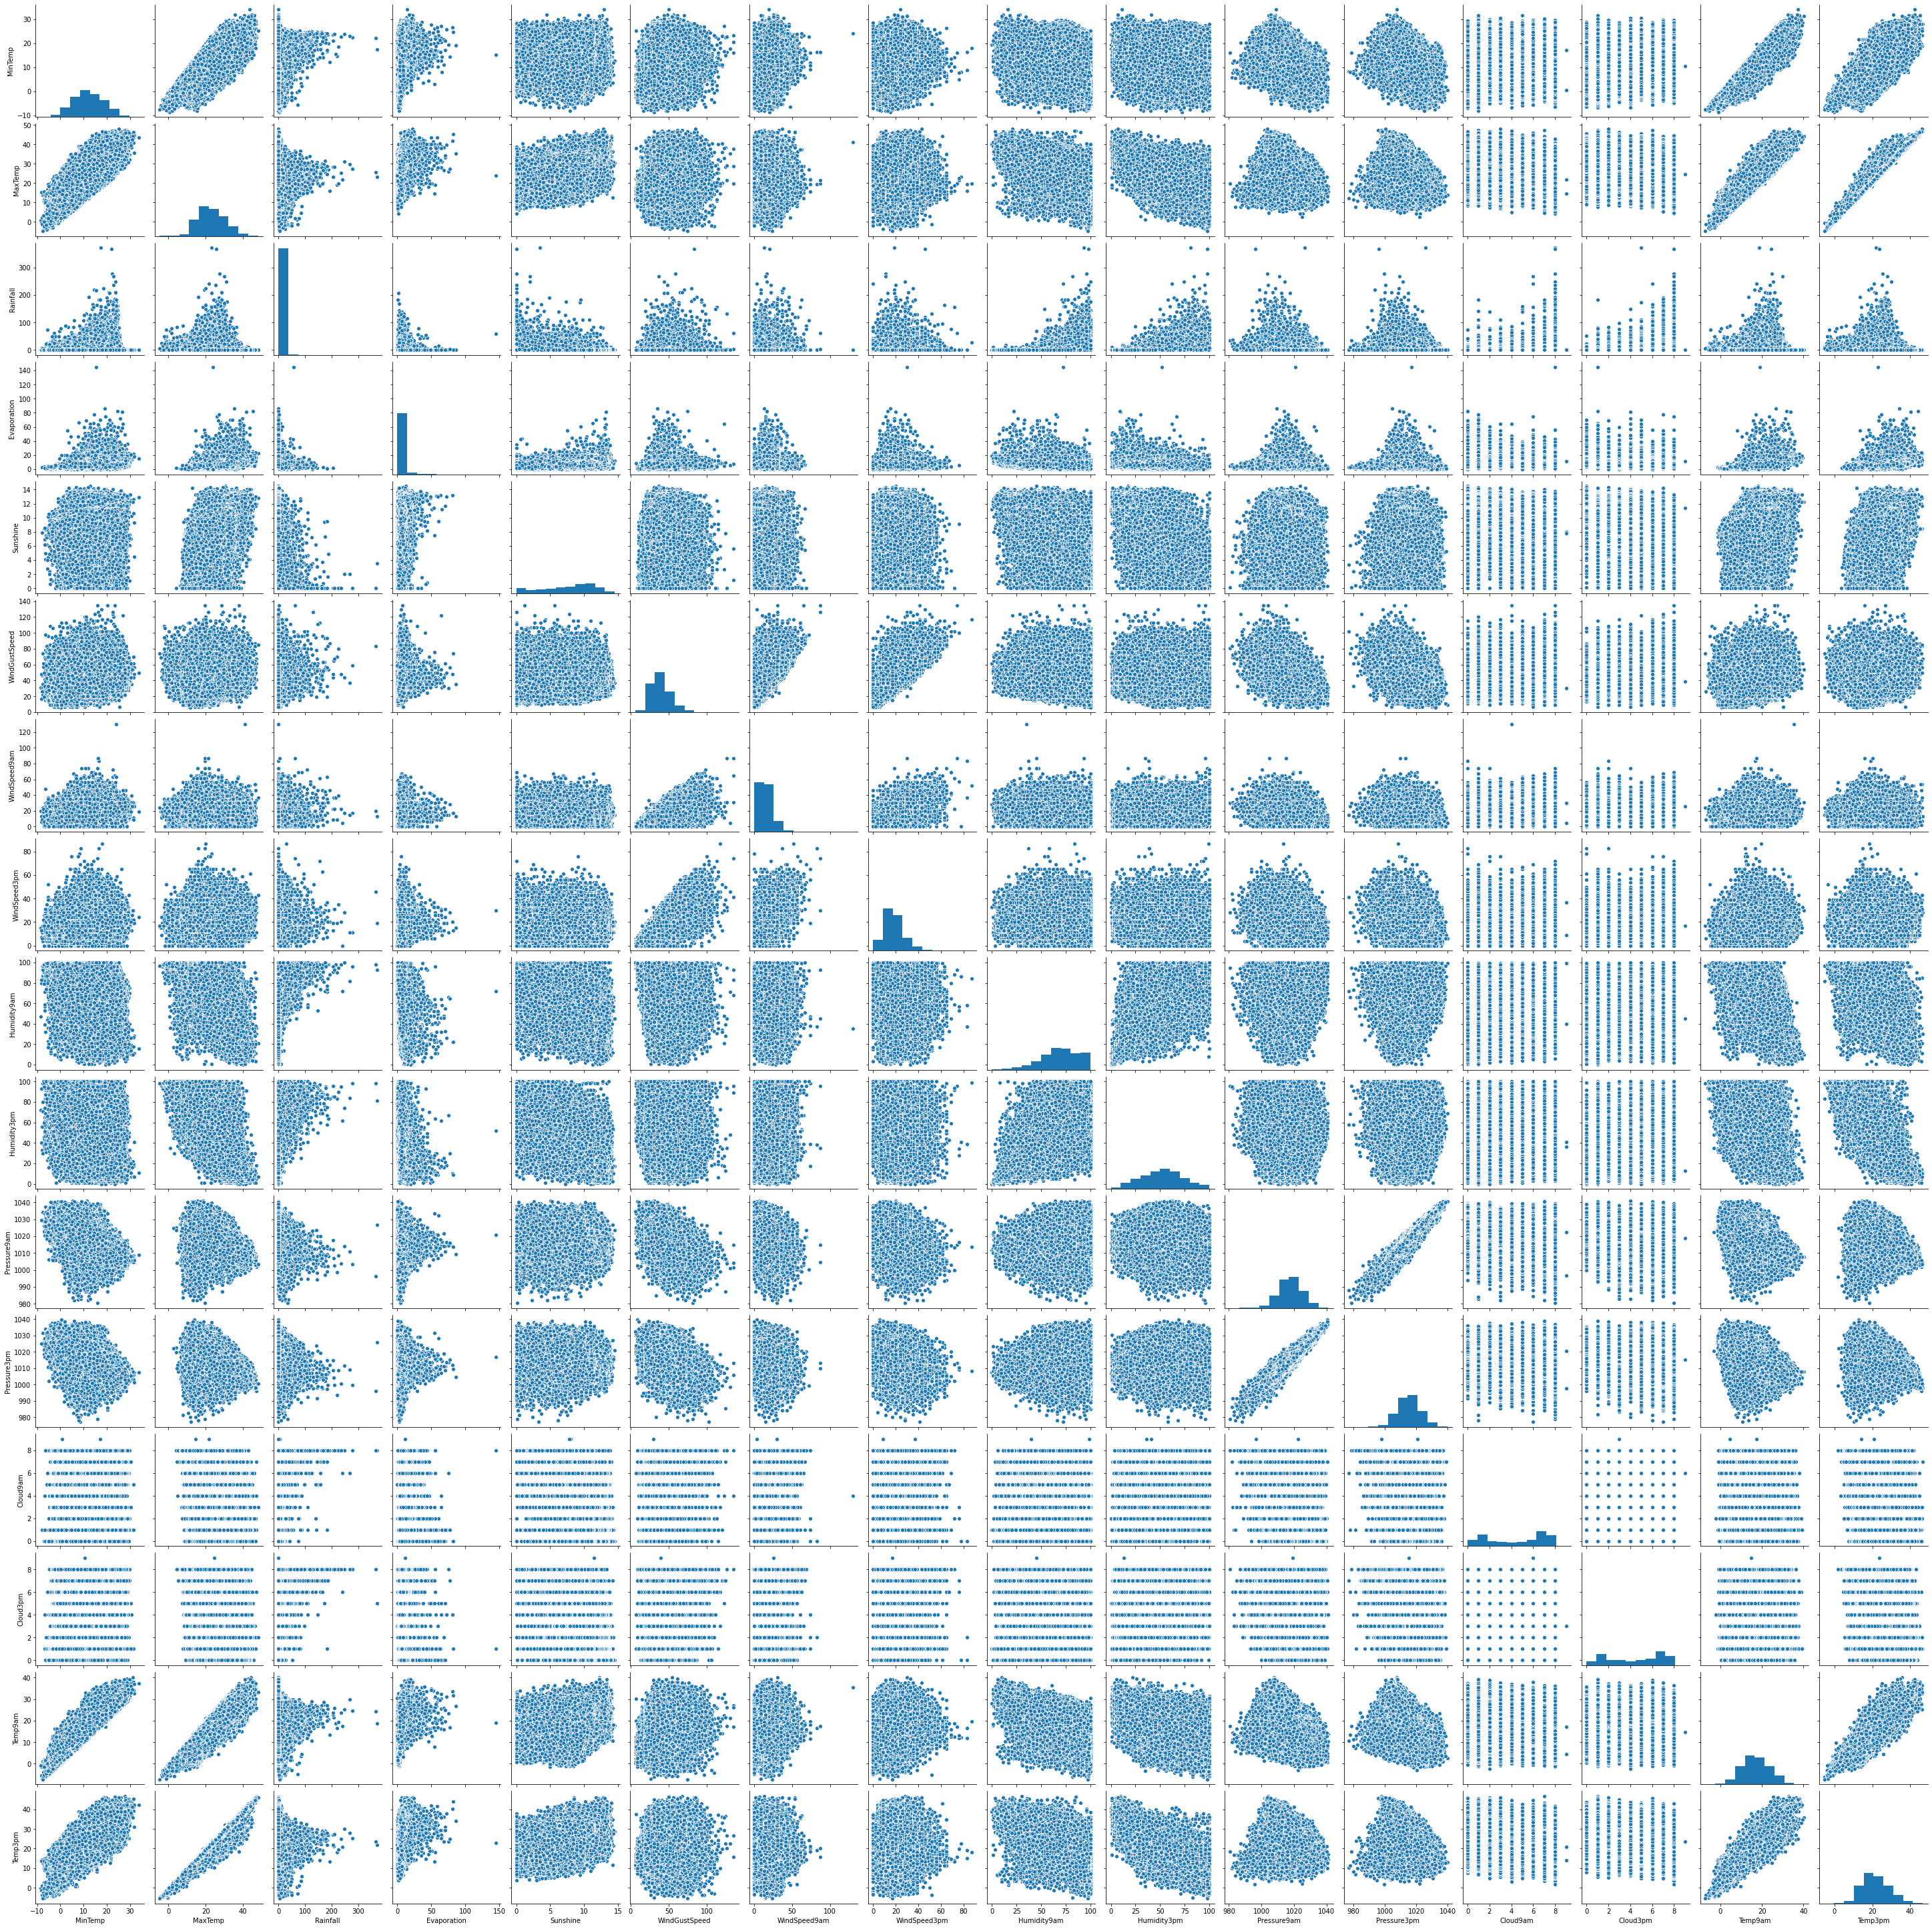

In [9]:
sns.pairplot(data[numerical_variable], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [10]:
# Dealing with outliers

q = data[numerical_variable].quantile(0.99)
data_new = data[data[numerical_variable]< q]

### Re-adjusting categorical variables to numeric variables

In [11]:
data = data.dropna(subset=['Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am','Temp3pm','RainToday'])
cat_variable = ['WindGustDir', 'WindDir9am']
num_variable = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
imp_cat = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
data[cat_variable] = imp_cat.fit_transform(data[cat_variable])
imp_num = SimpleImputer(missing_values = np.nan, strategy='median')
data[num_variable] = imp_num.fit_transform(data[num_variable])

In [12]:
le = LabelEncoder()
 
# Implementing LE on WindGustDir
le.fit(data.WindGustDir.drop_duplicates()) 
data.WindGustDir = le.transform(data.WindGustDir)

# Implementing LE on WindDir9am
le.fit(data.WindDir9am.drop_duplicates()) 
data.WindDir9am = le.transform(data.WindDir9am)

# Implementing LE on WindDir3pm
le.fit(data.WindDir3pm.drop_duplicates()) 
data.WindDir3pm = le.transform(data.WindDir3pm)

# Implementing LE on RainToday
le.fit(data.RainToday.drop_duplicates()) 
data.RainToday = le.transform(data.RainToday)

# Implementing LE on RainTomorrow
le.fit(data.RainTomorrow.drop_duplicates()) 
data.RainTomorrow = le.transform(data.RainTomorrow)

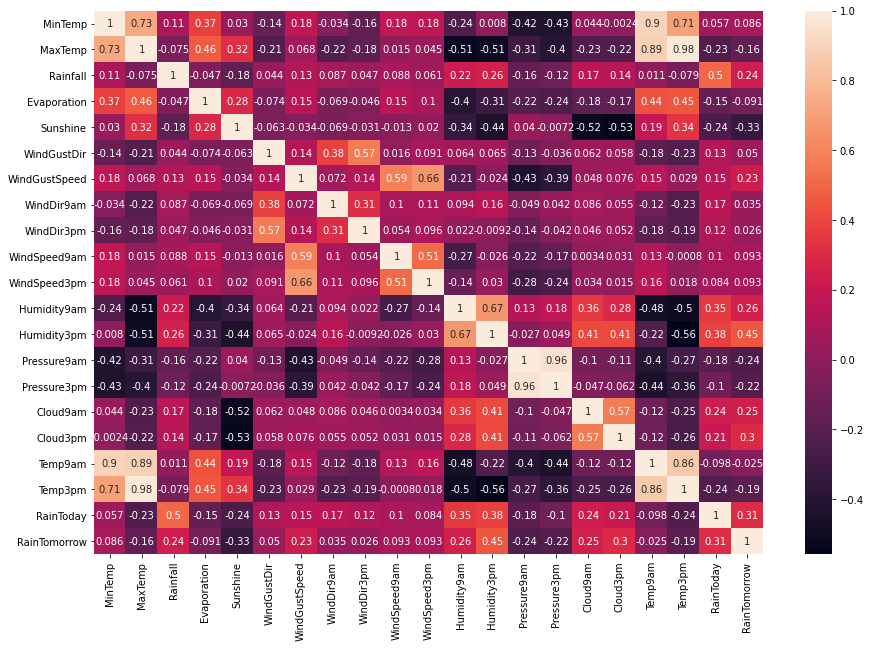

In [13]:
plt.figure(figsize=(15,10))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Implementing logistic regression 

In [27]:
# Assigning X and y
X = data.drop(['RainTomorrow', 'Date', 'Location'], axis=1)

y = data['RainTomorrow']

# Implementing train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Looking into the shape of training and test dataset
print(X_train.shape)
print(X_test.shape)

(107868, 16)
(26967, 16)


In [29]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8308
